## Pré-processamento - Análise Exploratória de Dados (AED) - Limpeza - Tratamento

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics  as sts

In [2]:
# gráficos estáticos logo abaixo da célula,
%matplotlib inline

In [3]:
df = pd.read_csv('titanic3.csv')

In [4]:
df.head()

,passenger_id,classe,sobreviveu,sexo,idade,irmaos_conjuge,pais_filhos,bilhete,tarifa,embarque
0,0,1,1,female,29.0000,0,0,24160,211.3375,S
1,1,1,1,male,0.9167,1,2,113781,151.5500,S
2,2,1,0,female,2.0000,1,2,113781,151.5500,S
3,3,1,0,male,30.0000,1,2,113781,151.5500,S
4,4,1,0,female,25.0000,1,2,113781,151.5500,S


In [5]:
df.isnull().sum()

passenger_id      0
classe            0
sobreviveu        0
sexo              0
idade             0
irmaos_conjuge    0
pais_filhos       0
bilhete           0
tarifa            0
embarque          0
dtype: int64

In [6]:
df1 = df.copy()

In [7]:
df1.head()

,passenger_id,classe,sobreviveu,sexo,idade,irmaos_conjuge,pais_filhos,bilhete,tarifa,embarque
0,0,1,1,female,29.0000,0,0,24160,211.3375,S
1,1,1,1,male,0.9167,1,2,113781,151.5500,S
2,2,1,0,female,2.0000,1,2,113781,151.5500,S
3,3,1,0,male,30.0000,1,2,113781,151.5500,S
4,4,1,0,female,25.0000,1,2,113781,151.5500,S


In [8]:
df1.describe()

,passenger_id,classe,sobreviveu,idade,irmaos_conjuge,pais_filhos,tarifa
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,654.000000,2.294882,0.381971,24.480265,0.498854,0.385027,33.282343
std,378.020061,0.837836,0.486055,16.795167,1.041658,0.865560,51.741062
min,0.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,327.000000,2.000000,0.000000,7.000000,0.000000,0.000000,7.895800
50%,654.000000,3.000000,0.000000,24.000000,0.000000,0.000000,14.454200
75%,981.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000
max,1308.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [9]:
df1.shape

(1309, 10)

In [10]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
passenger_id,1309.0,654.000000,378.020061,0.0000,327.0000,654.0000,981.000,1308.0000
classe,1309.0,2.294882,0.837836,1.0000,2.0000,3.0000,3.000,3.0000
sobreviveu,1309.0,0.381971,0.486055,0.0000,0.0000,0.0000,1.000,1.0000
idade,1309.0,24.480265,16.795167,0.1667,7.0000,24.0000,35.000,80.0000
irmaos_conjuge,1309.0,0.498854,1.041658,0.0000,0.0000,0.0000,1.000,8.0000
pais_filhos,1309.0,0.385027,0.865560,0.0000,0.0000,0.0000,0.000,9.0000
tarifa,1309.0,33.282343,51.741062,0.0000,7.8958,14.4542,31.275,512.3292


In [11]:
df1

,passenger_id,classe,sobreviveu,sexo,idade,irmaos_conjuge,pais_filhos,bilhete,tarifa,embarque
0,0,1,1,female,29.0000,0,0,24160,211.3375,S
1,1,1,1,male,0.9167,1,2,113781,151.5500,S
2,2,1,0,female,2.0000,1,2,113781,151.5500,S
3,3,1,0,male,30.0000,1,2,113781,151.5500,S
4,4,1,0,female,25.0000,1,2,113781,151.5500,S
...,...,...,...,...,...,...,...,...,...,...
1304,1304,3,0,female,14.5000,1,0,2665,14.4542,C
1305,1305,3,0,female,3.0000,1,0,2665,14.4542,C
1306,1306,3,0,male,26.5000,0,0,2656,7.2250,C
1307,1307,3,0,male,27.0000,0,0,2670,7.2250,C


### AED com dataprep

In [12]:
#pip install dataprep

In [13]:
from dataprep.datasets import load_dataset
from dataprep.eda import create_report

NumExpr defaulting to 8 threads.


In [14]:
#Imprime em uma guia do navegador
create_report(df).show_browser()
#Imprime no próprio notebook
#create_report(df)

  0%|                                                                                         | 0/1240 [00:00<…

### Tipos de variáveis 

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   passenger_id    1309 non-null   int64  
 1   classe          1309 non-null   int64  
 2   sobreviveu      1309 non-null   int64  
 3   sexo            1309 non-null   object 
 4   idade           1309 non-null   float64
 5   irmaos_conjuge  1309 non-null   int64  
 6   pais_filhos     1309 non-null   int64  
 7   bilhete         1309 non-null   object 
 8   tarifa          1309 non-null   float64
 9   embarque        1309 non-null   object 
dtypes: float64(2), int64(5), object(3)
memory usage: 102.4+ KB


In [123]:
#Obs: embora o campo Sobreviveu aparece como contínuo, mas não é, pois possui o valor Sim/Não. 
# sexo,embarque,sobreviveu

## Tipos de variáveis 

### Nominais - não dependem da ordem
sexo,embarque,sobreviveu

### Ordinais - dependem da ordem
classe

## Numéricas - contínuos, campos com vírgula
idade, tarifa

## Discretas -inteiros
irmaos_conjuge	, pais_filhos

In [16]:
#Agrupando o sexo
group = df1.groupby(['sexo']).size()
group

sexo
female    466
male      843
dtype: int64

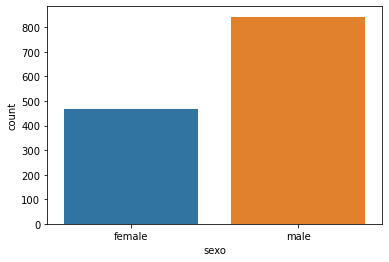

In [18]:
#Gráfico de barras tipo counterplot. Quantidade de pessoas que morreram
ax = sns.countplot(x=df1['sexo'])

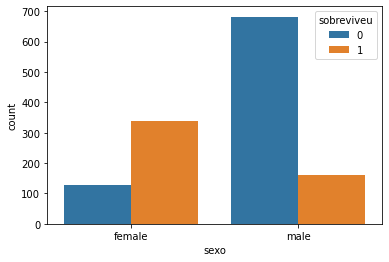

In [19]:
#Sexo x Sobrevivência e Mortes, por homens e mulheres
ax = sns.countplot(data=df1, x="sexo", hue="sobreviveu")

In [20]:
df1[['sobreviveu', 'sexo']].groupby(['sexo']).mean()

,sobreviveu
sexo,
female,0.727468
male,0.190985


In [21]:
# Agrupando o embarque
group = df1.groupby(['embarque']).size()
group

embarque
24.0      2
C       270
Q       123
S       914
dtype: int64

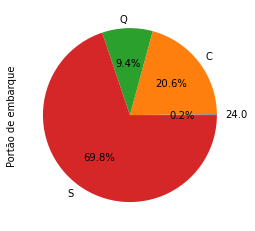

In [22]:
ax = group.plot.pie(autopct="%.1f%%", label = 'Portão de embarque')

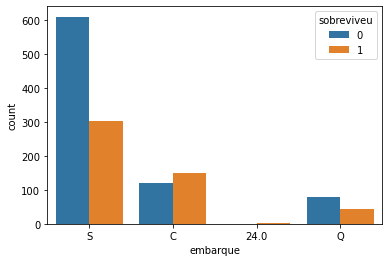

In [23]:
#Mortes x sobrevivência, por homens e mulheres
ax = sns.countplot(data=df1, x="embarque", hue="sobreviveu")

In [23]:
group = df1.groupby(['sobreviveu']).size()
group

sobreviveu
0    809
1    500
dtype: int64

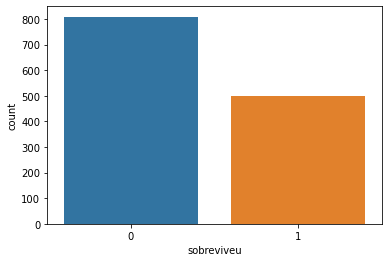

In [24]:
ax = sns.countplot(x=df1['sobreviveu'])

#### Importante: sobreviveu é a variável alvo(target)  e podemos observar que essa está desbalanceada. Mais tarde iremos balancear por diversas técnicas.

In [264]:
group = df1.groupby(['bilhete']).size()
group.max

<bound method NDFrame._add_numeric_operations.<locals>.max of bilhete
110152         3
110413         3
110465         2
110469         1
110489         1
              ..
W./C. 6608     5
W./C. 6609     1
W.E.P. 5734    2
W/C 14208      1
WE/P 5735      2
Length: 929, dtype: int64>

In [27]:
#!pip install wordcloud 

In [198]:
from wordcloud import WordCloud
from matplotlib.colors import ListedColormap

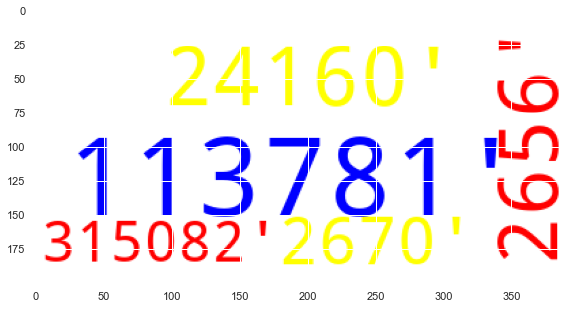

In [287]:
palavras = str(df1['bilhete'].values)
# Definição das cores que serão utilizadas na nuvem de palavras
mapa_cores = ListedColormap(['orange', 'green', 'red', 'magenta','blue','yellow'])
# Criação da nuvem de palavras, com no máximo 100 palavras e utilizando as stop words
nuvem = WordCloud(background_color = 'white',
                  colormap = mapa_cores,
                  stopwords = '',
                  max_words = 929)
# Criação e visualização da nuvem de palavras
nuvem.generate(palavras)
ax = plt.imshow(nuvem)

In [288]:
#excluir a coluna bilhete, pois 
df1.drop(['bilhete'],axis=1, inplace=True)
df1.head(1)

,passenger_id,classe,sobreviveu,sexo,idade,irmaos_conjuge,pais_filhos,tarifa,embarque
0,0,1,1,female,29.0,0,0,211.3375,S


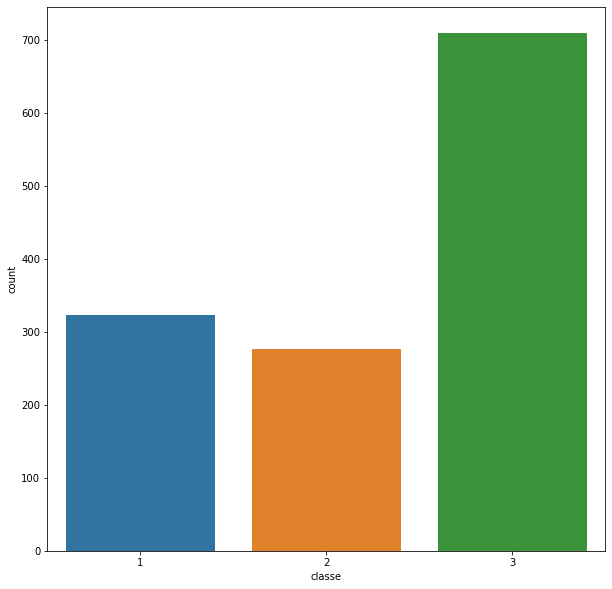

In [150]:
ax = sns.countplot(x=df1['classe'])

In [289]:
#Obtedo os atributos apenas os númericos
#Discretos - Inteiros (# irmaos_conjuge,pais_filhos) e Contínuos - Campos com vírgula 
#(# idade, tarifa)
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df1.select_dtypes(include=numerics)
df_numeric

,passenger_id,classe,sobreviveu,idade,irmaos_conjuge,pais_filhos,tarifa
0,0,1,1,29.0000,0,0,211.3375
1,1,1,1,0.9167,1,2,151.5500
2,2,1,0,2.0000,1,2,151.5500
3,3,1,0,30.0000,1,2,151.5500
4,4,1,0,25.0000,1,2,151.5500
...,...,...,...,...,...,...,...
1304,1304,3,0,14.5000,1,0,14.4542
1305,1305,3,0,3.0000,1,0,14.4542
1306,1306,3,0,26.5000,0,0,7.2250
1307,1307,3,0,27.0000,0,0,7.2250


In [290]:
#Vamos remover as variáveis classe, sobreviveu e passenger_id.
df_numeric.drop(['classe'],axis=1, inplace=True)
df_numeric.drop(['sobreviveu'],axis=1, inplace=True)
df_numeric.drop(['passenger_id'],axis=1, inplace=True)

atrib = df_numeric
atrib

,idade,irmaos_conjuge,pais_filhos,tarifa
0,29.0000,0,0,211.3375
1,0.9167,1,2,151.5500
2,2.0000,1,2,151.5500
3,30.0000,1,2,151.5500
4,25.0000,1,2,151.5500
...,...,...,...,...
1304,14.5000,1,0,14.4542
1305,3.0000,1,0,14.4542
1306,26.5000,0,0,7.2250
1307,27.0000,0,0,7.2250


### Criandos histogramas para todos os atributos numéricos

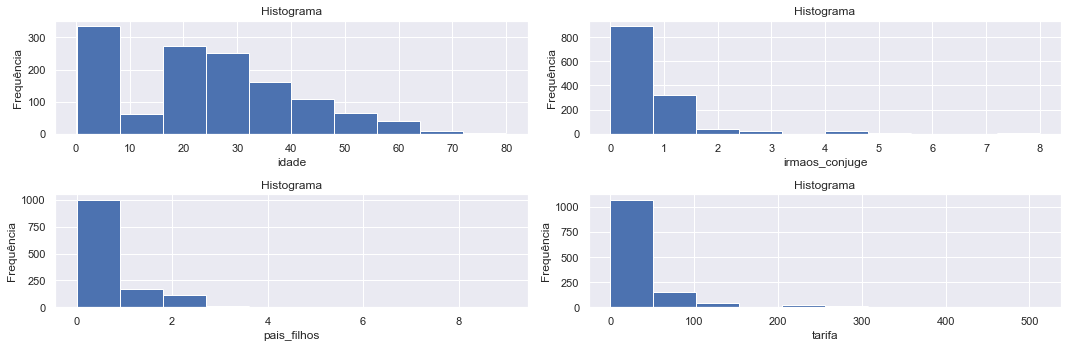

In [291]:
#Montar histogramas de todos. 
#5 figuras por linha 
f, ax = plt.subplots(2,2)
#Colocando lado a lado
ax = ax.flatten()
tam = len(atrib)

for column, posicao in zip(df_numeric, range(0, tam-1, 1)) :    
    ax[posicao].hist(df_numeric[column])
    ax[posicao].set_title('Histograma')
    ax[posicao].set_ylabel('Frequência')
    ax[posicao].set_xlabel(column)

plt.tight_layout()    
plt.rcParams['figure.figsize'] = (10,10)
plt.show()   

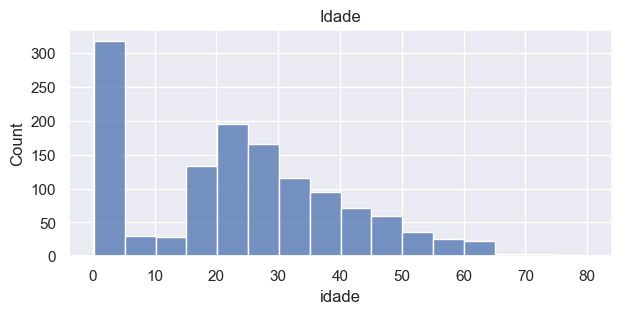

In [292]:
#Histograma individual com curva de distrivuição dos dados
#sns.displot(data=penguins, x="flipper_length_mm", kde=True) -> esse tem a curva
plt.figure(figsize=(7,3),dpi=100)
ax = sns.histplot(df1['idade']).set_title('Idade')

### Criandos histogramas com curva de densidade para todos os atributos numéricos

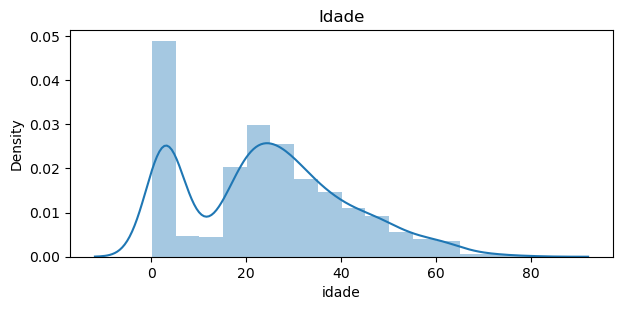

In [37]:
plt.figure(figsize=(7,3),dpi=100)
sns.distplot(df1['idade']).set_title('Idade')
plt.show()

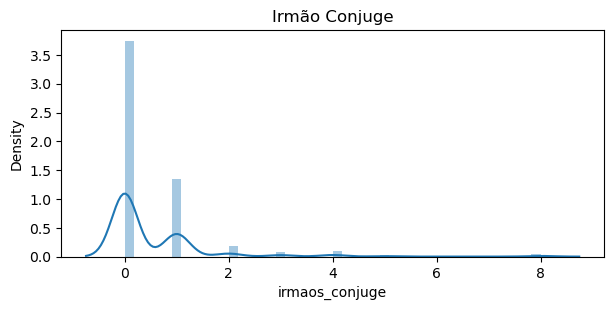

In [38]:
plt.figure(figsize=(7,3),dpi=100)
sns.distplot(df1['irmaos_conjuge']).set_title('Irmão Conjuge')
plt.show()

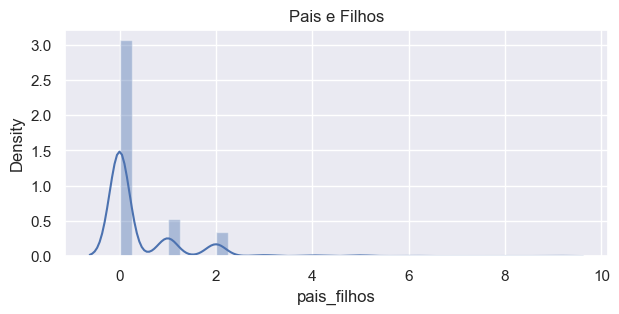

In [293]:
plt.figure(figsize=(7,3),dpi=100)
sns.distplot(df1['pais_filhos']).set_title('Pais e Filhos')
plt.show()

### obs: uma curva de densidade descreve o padrão geral de uma distribuição. A área sob a curva e acima de qualquer intervalo de valores é a proporção de todas as observações que se enquadram naquele intervalo

### Criandos boxplot para todos os atributos numéricos

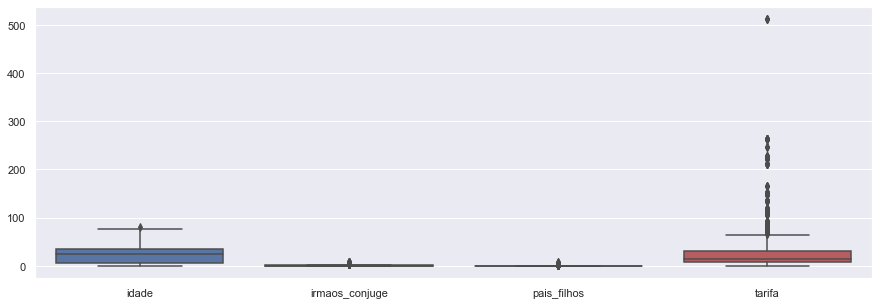

In [205]:
#boxplot = df_numeric.boxplot(grid=True,figsize=(10,5))
sns.set(rc={'figure.figsize': (15, 5)}) 
ax = sns.boxplot(data=df_numeric)

### Vamos fazer um a um

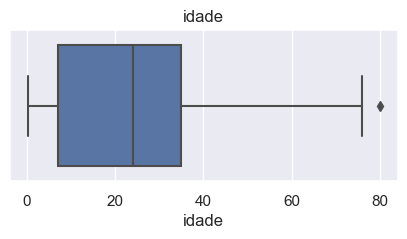

In [84]:
#Vamos fazer um a um idade
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(df1['idade']).set_title('idade')

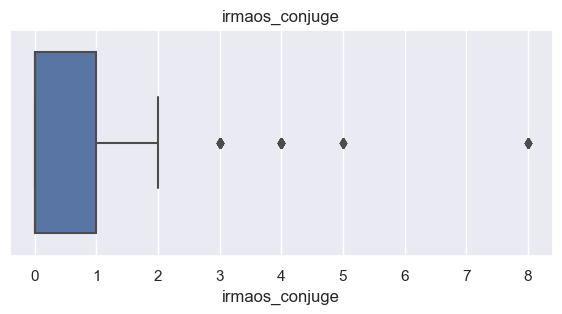

In [38]:
#irmaos_conjuge
plt.figure(figsize=(7,3),dpi=100)
ax = sns.boxplot(df1['irmaos_conjuge']).set_title('irmaos_conjuge')

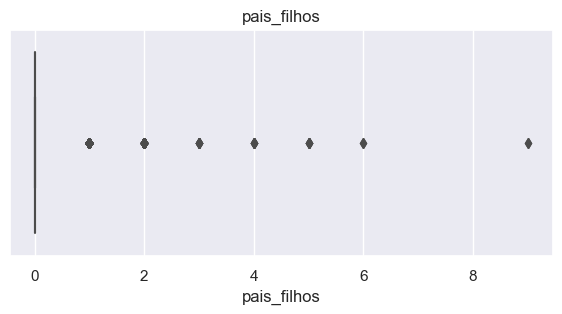

In [86]:
#pais_filhos
plt.figure(figsize=(7,3),dpi=100)
ax = sns.boxplot(df1['pais_filhos']).set_title('pais_filhos')

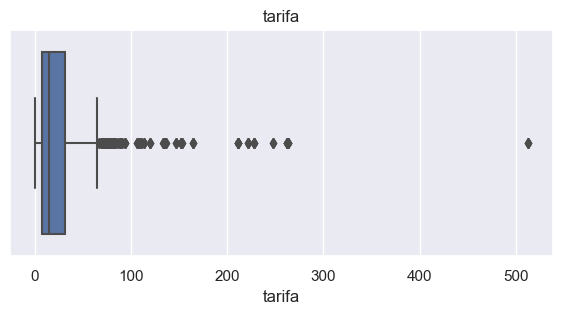

In [87]:
#tarifa
plt.figure(figsize=(7,3),dpi=100)
ax = sns.boxplot(df1['tarifa']).set_title('tarifa')

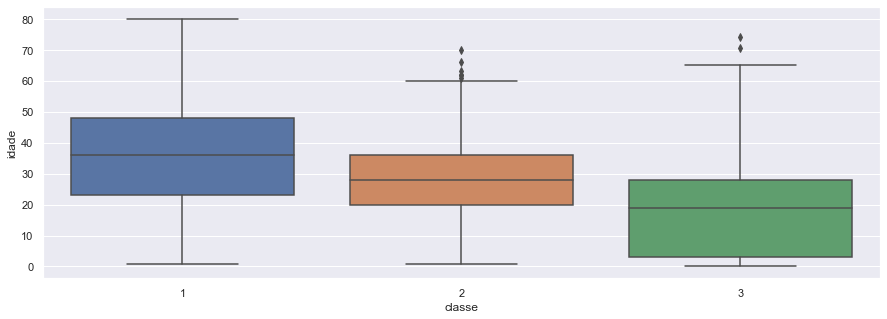

In [206]:
ax = sns.boxplot(data=df1, x="classe", y="idade")

In [294]:
df1.head()

,passenger_id,classe,sobreviveu,sexo,idade,irmaos_conjuge,pais_filhos,tarifa,embarque
0,0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,1,male,0.9167,1,2,151.5500,S
2,2,1,0,female,2.0000,1,2,151.5500,S
3,3,1,0,male,30.0000,1,2,151.5500,S
4,4,1,0,female,25.0000,1,2,151.5500,S


### Correlação

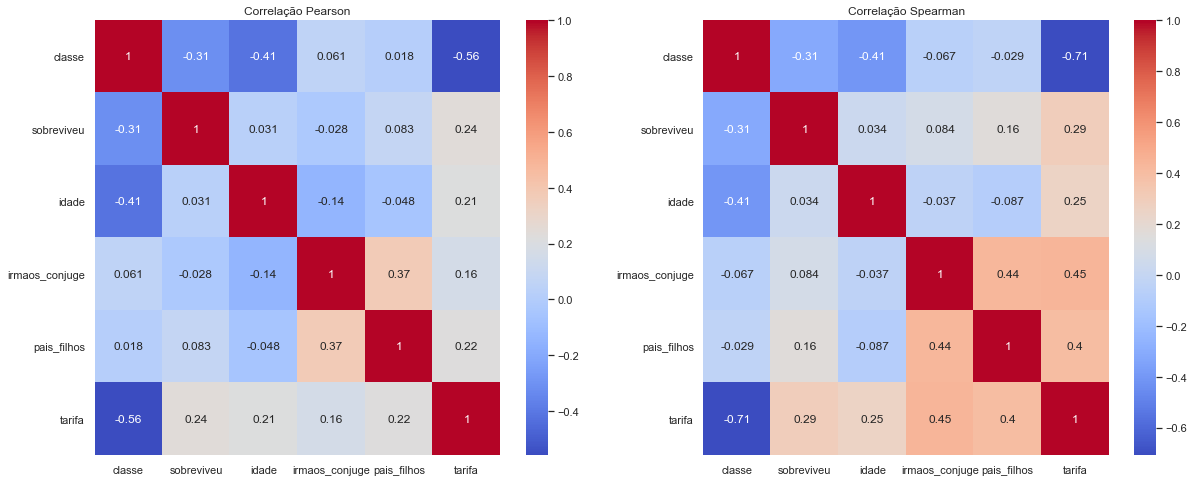

In [208]:
# Correlação Pearson e Spearman
fig, ax = plt.subplots(1,2,figsize=(20,8))
g = sns.heatmap(df1.corr(method='pearson'), cmap='coolwarm', annot=True, ax=ax[0])
g.set_title('Correlação Pearson')
g2 = sns.heatmap(df1.corr(method='spearman'), cmap='coolwarm', annot=True, ax=ax[1])
g2.set_title('Correlação Spearman');

### Scatter Plot

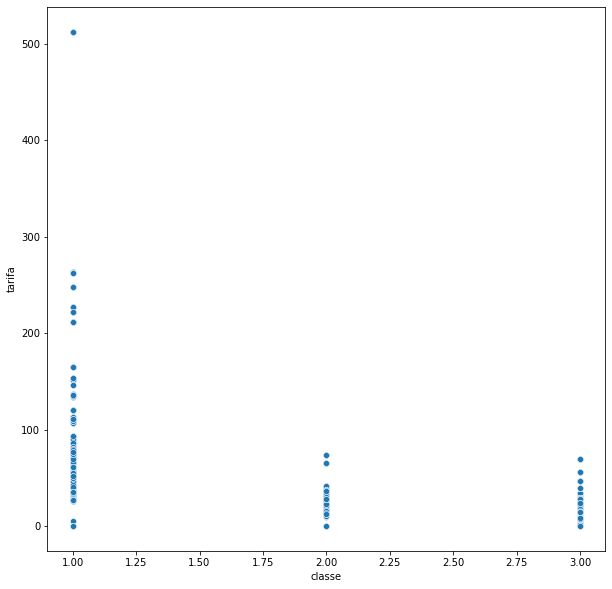

In [161]:
#Classe e tarifa
ax = sns.scatterplot(x='classe', y='tarifa', data=df1)

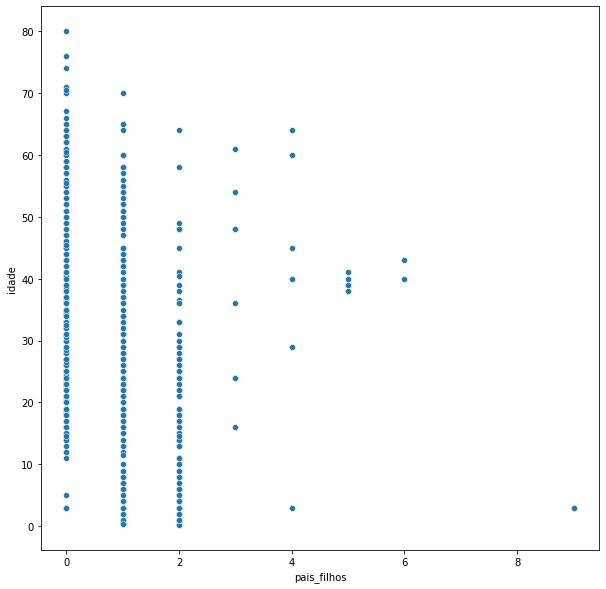

In [49]:
ax = sns.scatterplot(x='pais_filhos', y='idade', data=df1)

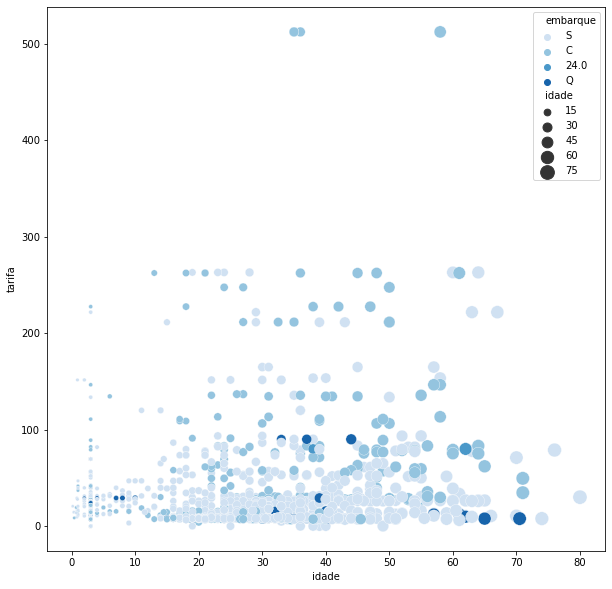

In [162]:
ax = sns.scatterplot(x='idade', y='tarifa', hue = 'embarque', size = 'idade', 
                     palette = 'Blues', data=df1, sizes = (10,200))

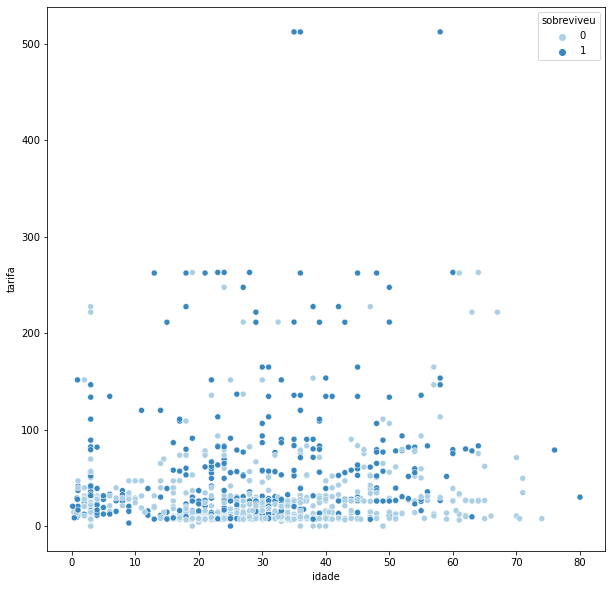

In [54]:
ax = sns.scatterplot(x='idade', y='tarifa', hue = 'sobreviveu', 
                     palette = 'Blues', data=df1)

### O Regplot é usada para plotar a Regressão Linear

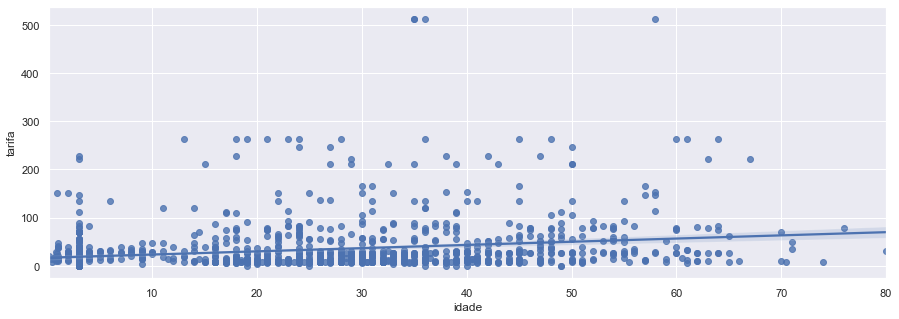

In [209]:
#O regplot
# This method is used to plot data and a linear regression model fit. There are a number of mutually 
#exclusive options for estimating the regression model. For more information
ax = sns.regplot(df1['idade'],df1['tarifa'])

### Corrigir outliers, caso precise

In [295]:
##outliers em tarifa, vamos considerar 2 desvios padrão
desv = sts.stdev(df1['tarifa'])
desv

51.741061926996416

In [296]:
#definir padrão como maior que 2 desvios padrão
#checamos se algum atende critério
df1.loc[df1['tarifa'] >=  2 * desv ] 

,passenger_id,classe,sobreviveu,sexo,idade,irmaos_conjuge,pais_filhos,tarifa,embarque
0,0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,1,male,0.9167,1,2,151.5500,S
2,2,1,0,female,2.0000,1,2,151.5500,S
3,3,1,0,male,30.0000,1,2,151.5500,S
4,4,1,0,female,25.0000,1,2,151.5500,S
...,...,...,...,...,...,...,...,...,...
312,312,1,0,male,50.0000,1,1,211.5000,C
313,313,1,0,male,27.0000,0,2,211.5000,C
314,314,1,1,female,50.0000,1,1,211.5000,C
319,319,1,1,female,31.0000,0,0,134.5000,C


In [297]:
#atribumos
#vamos atualiar salarios para mediana, calculamos
mediana = sts.median(df1['tarifa'])
mediana
df1.loc[df1['tarifa'] >=  2 * desv, 'tarifa'] = mediana

In [298]:
#checamos se algum atende critério
df1.loc[df1['tarifa'] >=  2 * desv ] 

,passenger_id,classe,sobreviveu,sexo,idade,irmaos_conjuge,pais_filhos,tarifa,embarque


In [299]:
#Vamos analisar irmaos_conjuge
df1.loc[df1['irmaos_conjuge'] >=  2 * desv ] 

,passenger_id,classe,sobreviveu,sexo,idade,irmaos_conjuge,pais_filhos,tarifa,embarque


In [300]:
#Vamos analisar pais_filhos
df1.loc[df1['pais_filhos'] >=  2 * desv ] 

,passenger_id,classe,sobreviveu,sexo,idade,irmaos_conjuge,pais_filhos,tarifa,embarque


In [301]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
passenger_id,1309.0,654.000000,378.020061,0.0000,327.0000,654.0000,981.00,1308.0
classe,1309.0,2.294882,0.837836,1.0000,2.0000,3.0000,3.00,3.0
sobreviveu,1309.0,0.381971,0.486055,0.0000,0.0000,0.0000,1.00,1.0
idade,1309.0,24.480265,16.795167,0.1667,7.0000,24.0000,35.00,80.0
irmaos_conjuge,1309.0,0.498854,1.041658,0.0000,0.0000,0.0000,1.00,8.0
pais_filhos,1309.0,0.385027,0.865560,0.0000,0.0000,0.0000,0.00,9.0
tarifa,1309.0,21.782049,20.054646,0.0000,7.8958,14.4542,26.55,93.5


### O interessante depois que remover os outliers fazer novamente a correlação, pois o outliers podem influenciar.

In [ ]:
# Correlação Pearson e Spearman
fig, ax = plt.subplots(1,2,figsize=(20,8))
g = sns.heatmap(df1.corr(method='pearson'), cmap='coolwarm', annot=True, ax=ax[0])
g.set_title('Correlação Pearson')
g2 = sns.heatmap(df1.corr(method='spearman'), cmap='coolwarm', annot=True, ax=ax[1])
g2.set_title('Correlação Spearman');

### Balanceamento dos dados

In [302]:
df1.sobreviveu.value_counts() 

0    809
1    500
Name: sobreviveu, dtype: int64

In [303]:
#Upsampling da minoria - aumentar a classe minoritária
from sklearn.utils import resample
mask = df1.sobreviveu == 1
surv_df = df1[mask]
death_df = df1[~mask]
df_upsample = resample(surv_df,replace=True,n_samples=len(death_df),random_state=42,)
df2 = pd.concat([death_df, df_upsample]) 

In [304]:
df2.sobreviveu.value_counts()

0    809
1    809
Name: sobreviveu, dtype: int64

In [305]:
#Downsampling da maioria - diminuir a classe majoritária
from sklearn.utils import resample
mask = df1.sobreviveu == 1
surv_df = df1[mask]
death_df = df1[~mask]
df_downsample = resample(death_df,replace=False,n_samples=len(surv_df),random_state=42,)
df3 = pd.concat([surv_df, df_downsample])

In [306]:
df3.sobreviveu.value_counts()

0    500
1    500
Name: sobreviveu, dtype: int64

In [307]:
#Aqui já vou usar o df1 até o final
df1 = df3.copy()

In [308]:
df1.sobreviveu.value_counts()

0    500
1    500
Name: sobreviveu, dtype: int64

In [309]:
#Vamos ver se está com os campos que eu quero
df1.head(5)

,passenger_id,classe,sobreviveu,sexo,idade,irmaos_conjuge,pais_filhos,tarifa,embarque
0,0,1,1,female,29.0000,0,0,14.4542,S
1,1,1,1,male,0.9167,1,2,14.4542,S
5,5,1,1,male,48.0000,0,0,26.5500,S
6,6,1,1,female,63.0000,1,0,77.9583,S
8,8,1,1,female,53.0000,2,0,51.4792,S


### Amostragem aleatório simples

In [310]:
#Amostra com 30%
#Como é aleatório simples, pode ser que venha mais de uma classe do que de outra.
df4 = df1.sample(frac = 0.30)
df4.sobreviveu.value_counts()

1    151
0    149
Name: sobreviveu, dtype: int64

### Amostragem estratificada
#### Ela vai me garantir que obtenha os mesmo percentual de amostras para um algo.
Ex:
* População = 90 pessoas
* 54 mulheres e 36 homens
* Mulheres representam 60% da população
* Homens representam 40% da população
* Quantidade de mulheres 54*10/100 = 5,4 (arredonda para 5)
* Quantidade de homens 36*10/100 = 3,6 (arredonda para 4)
#### Como fazer isso no Python? Vamos aprender na nossa base de dados Titanic.

In [311]:
from sklearn.model_selection import StratifiedShuffleSplit

In [312]:
#Verificando quantos registros no df3
df1.shape

(1000, 9)

In [313]:
amostra = StratifiedShuffleSplit(test_size=0.20)
#primeiro parâmetros o dataset e o segundo é o campo que vamos usar para dividir
# No resultado vai criar dois dataframe df_x e df_y. Um terá 20% dos dados e o outro 80%
for x, y in amostra.split(df1,df1['sobreviveu']):
    df_x  = df1.iloc[x]
    df_y  = df1.iloc[y]


In [314]:
df_x.shape, df_y.shape

((800, 9), (200, 9))

In [315]:
#Como vocês verão, vai dividir igualmente
df_x.sobreviveu.value_counts(),df_y.sobreviveu.value_counts()

(0    400
 1    400
 Name: sobreviveu, dtype: int64,
 0    100
 1    100
 Name: sobreviveu, dtype: int64)

###  Variáveis Dummy e Mapeamento

In [316]:
group = df1.groupby(['classe']).size()
group

classe
1    281
2    216
3    503
dtype: int64

In [317]:
#Vamos fazer copias pata brincarmos
df2 = df1.copy()
df3 = df1.copy()
df3.head()

,passenger_id,classe,sobreviveu,sexo,idade,irmaos_conjuge,pais_filhos,tarifa,embarque
0,0,1,1,female,29.0000,0,0,14.4542,S
1,1,1,1,male,0.9167,1,2,14.4542,S
5,5,1,1,male,48.0000,0,0,26.5500,S
6,6,1,1,female,63.0000,1,0,77.9583,S
8,8,1,1,female,53.0000,2,0,51.4792,S


In [318]:
# Vamos mapear o sexo, mas não é legal fazer desse jeito
sexo = {'male': 0, 'female': 1}
df2['sexo'] = df2['sexo'].map(sexo)

In [319]:
df2.head()

,passenger_id,classe,sobreviveu,sexo,idade,irmaos_conjuge,pais_filhos,tarifa,embarque
0,0,1,1,1,29.0000,0,0,14.4542,S
1,1,1,1,0,0.9167,1,2,14.4542,S
5,5,1,1,0,48.0000,0,0,26.5500,S
6,6,1,1,1,63.0000,1,0,77.9583,S
8,8,1,1,1,53.0000,2,0,51.4792,S


In [320]:
#Posso utilizar outro maneira como o label enconder e OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [321]:
#Estou copiando para esse dataset df_aux, pois não quero perder o que ei fiz até agora. 
df_aux = df1.copy()

In [322]:
labelencoder = LabelEncoder()
df_aux['sexo'] = labelencoder.fit_transform(df_aux['sexo'])

In [323]:
df_aux.head()

,passenger_id,classe,sobreviveu,sexo,idade,irmaos_conjuge,pais_filhos,tarifa,embarque
0,0,1,1,0,29.0000,0,0,14.4542,S
1,1,1,1,1,0.9167,1,2,14.4542,S
5,5,1,1,1,48.0000,0,0,26.5500,S
6,6,1,1,0,63.0000,1,0,77.9583,S
8,8,1,1,0,53.0000,2,0,51.4792,S


In [324]:
#Vou copiar novamente
df_aux = df1.copy()

In [325]:
# O correto é usar o get_dummies do pandas
sexo = {'male': 'homem', 'female': 'mulher'}
df_aux['sexo'] = df_aux['sexo'].map(sexo)

In [326]:
df_aux = pd.get_dummies(df_aux, columns=['sexo'])

In [327]:
df_aux.head()

,passenger_id,classe,sobreviveu,idade,irmaos_conjuge,pais_filhos,tarifa,embarque,sexo_homem,sexo_mulher
0,0,1,1,29.0000,0,0,14.4542,S,0,1
1,1,1,1,0.9167,1,2,14.4542,S,1,0
5,5,1,1,48.0000,0,0,26.5500,S,1,0
6,6,1,1,63.0000,1,0,77.9583,S,0,1
8,8,1,1,53.0000,2,0,51.4792,S,0,1


In [328]:
#Vamos fazer tudo de uma vez
df1.describe(include='O')

,sexo,embarque
count,1000,1000
unique,2,4
top,male,S
freq,578,675


In [329]:
df1 = pd.get_dummies(df1, columns=['sexo','embarque'])

In [330]:
df1.head()

,passenger_id,classe,sobreviveu,idade,irmaos_conjuge,pais_filhos,tarifa,sexo_female,sexo_male,embarque_24.0,embarque_C,embarque_Q,embarque_S
0,0,1,1,29.0000,0,0,14.4542,1,0,0,0,0,1
1,1,1,1,0.9167,1,2,14.4542,0,1,0,0,0,1
5,5,1,1,48.0000,0,0,26.5500,0,1,0,0,0,1
6,6,1,1,63.0000,1,0,77.9583,1,0,0,0,0,1
8,8,1,1,53.0000,2,0,51.4792,1,0,0,0,0,1


In [331]:
df1.to_csv('titanic3_processado.csv',index = False)

### Referências
#### Harrison, Matt. Machine Learning – Guia de Referência Rápida. Novatec Editora. Edição do Kindle. 
####  SEABORN. Disponível em:https://seaborn.pydata.org/generated/seaborn.countplot.html. Acesso em 29/09/2022.
####  Matplotlib. Disponível em: https://matplotlib.org/ . Acesso 19/09/2022
####  Pyjanitor. Disponível em:https://pyjanitor-devs.github.io/pyjanitor/. Acesso em 21/09/2022.
#### Imbalanced-learn. Disponível em: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/. Acesso em 21/09/2022.
#### Amostra Estratificada. Disponível em:https://iaexpert.academy/2022/02/17/amostragem-estratificada-na-pratica-com-python/. Acesso em 04/10/2022. 